# 프로젝트 1 - 당뇨병 수치를 맞춰보자!

# (프로젝트 1-1) 데이터 가져오기

In [1]:
from sklearn.datasets import load_diabetes
import numpy as np

diabetes = load_diabetes(as_frame=True)

df_X = diabetes.data
df_y = diabetes.target

# (프로젝트 1-2) 모델에 입력할 데이터 X준비하기 

In [2]:
np_X = df_X.values

# (프로젝트 1-3) 모델에 예측할 데이터 y준비하기

In [3]:
np_y = df_y.values

# (프로젝트 1-4) train데이터와 test데이터 분리하기

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np_X, np_y, test_size=0.2, random_state=11 )

# (프로젝트 1-5) 모델 준비하기

In [5]:
W = np.random.rand(10)
b = np.random.rand()

def model( X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:,i]*W[i]
    predictions += b
    
    return predictions

# (프로젝트 1-6) 손실함수 loss정의하기

In [6]:
def MSE(a,b):
    mse = ((a-b) **2 ).mean()
    #rmse = mse ** 0.5
    return mse

def loss(X,W,b,y):
    predictions = model(X,W,b)
    L = MSE(predictions, y)
    return L

# (프로젝트 1-7) 기울기를 구하는 gradient함수 구현하기

In [7]:
def gradient(X,W,b,y):
    N = len(W)
    
    y_pred = model(X,W,b)
    
    dW = 1/N * 2 * X.T.dot(y_pred-y)
    db = 2 * (y_pred - y).mean()
    return dW, db

# (프로젝트 1-8) 하이퍼 파라미터인 학습률 설정하기

In [8]:
LEARNING_RATE = 0.0010

# (프로젝트 1-9) 모델 학습하기

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

losses = []

for i in range(30001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 5000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))



Iteration 0 : Loss 28310.5307
Iteration 5000 : Loss 3081.4699
Iteration 10000 : Loss 2871.2910
Iteration 15000 : Loss 2825.6952
Iteration 20000 : Loss 2814.0482
Iteration 25000 : Loss 2810.4611
Iteration 30000 : Loss 2809.0816


# (프로젝트 1-10) test데이터에 대한 성능 확인하기

In [10]:
y_pred = model(X_test, W, b)        
mse = mean_squared_error(y_test, y_pred)

# (프로젝트 1-11) 정답데이터와 예측한 데이터 시각화하기

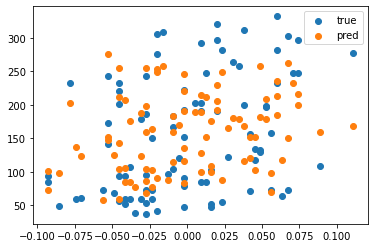

In [12]:
#x데이터 첫번째 컬럼, y축은 타겟 데이터 

plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], y_pred, label="pred")
plt.legend()
plt.show()

# 프로젝트 2

# (프로젝트 2-1) 데이터 가져오기